In [1]:
import pandas as pd

df_application = pd.read_csv('application_record.csv')

df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [2]:
df_credit = pd.read_csv('credit_record.csv')

df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
starter_month=pd.DataFrame(df_credit.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
starter_month=starter_month.rename(columns={'MONTHS_BALANCE':'Account day'})
df_application=pd.merge(df_application,starter_month,how='left',on='ID')

df_credit['dep_value'] = None
df_credit['dep_value'][df_credit['STATUS'] =='2']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='3']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='4']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='5']='Yes'

cpunt=df_credit.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes'
cpunt['dep_value'][cpunt['dep_value'] == 0]='No'
cpunt = cpunt[['dep_value']]

df_application = pd.merge(df_application,cpunt,how='inner',on='ID')
df_application['Risky']=df_application['dep_value']
df_application.loc[df_application['Risky']=='Yes','Risky']=1
df_application.loc[df_application['Risky']=='No','Risky']=0
df_application.drop('dep_value',axis=1,inplace=True)

/tmp/ipykernel_12985/211919727.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  starter_month=pd.DataFrame(df_credit.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
/tmp/ipykernel_12985/211919727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit['dep_value'][df_credit['STATUS'] =='2']='Yes'
/tmp/ipykernel_12985/211919727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit['dep_value'][df_credit['STATUS'] =='3']='Ye

In [4]:
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account day,Risky
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-9.0,1


In [5]:
df_application.drop('ID',axis=1,inplace=True)


In [6]:
df_app_train_original.to_csv('/home/jmarquez211/Projects/Python/Tutoriales/Gradient Boosting/train_df_app.csv)',index=False)
df_app_test_original.to_csv('/home/jmarquez211/Projects/Python/Tutoriales/Gradient Boosting/test_df_app.csv',index=False)

In [6]:
df_application.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
Account day_x              0
Risky                      0
Account day_y              0
dtype: int64

In [7]:
df_application['OCCUPATION_TYPE'].fillna(df_application['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [8]:
df_application.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Account day_x          0
Risky                  0
Account day_y          0
dtype: int64

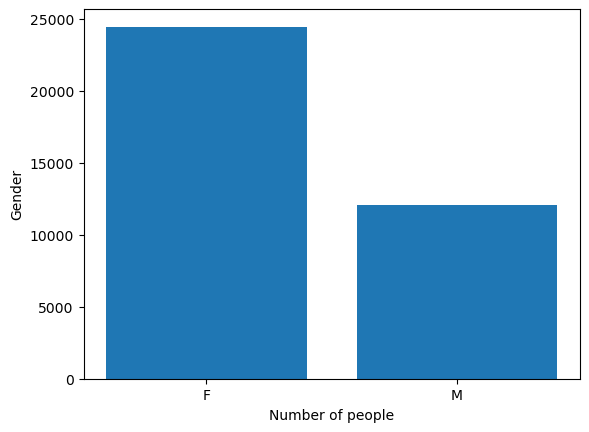

In [10]:
import matplotlib.pyplot as plt

#positions_gen = range(len(df_train_copy['CODE_GENDER']))

plt.bar(df_application['CODE_GENDER'].value_counts().index,df_application['CODE_GENDER'].value_counts().values)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.show();


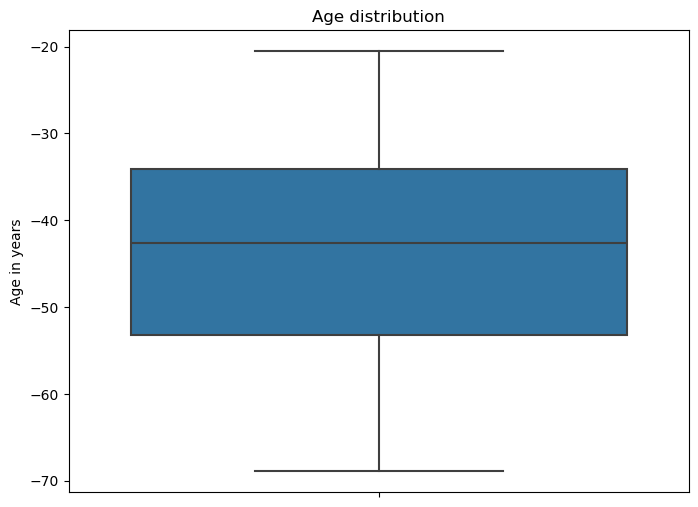

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir la variable 'days_birth' entre 365 para obtener la edad en años
df_application['DAYS_BIRTH'] = df_application['DAYS_BIRTH'] / 365

# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='DAYS_BIRTH', data=df_application)
plt.title('Age distribution')
plt.ylabel('Age in years')
plt.show();

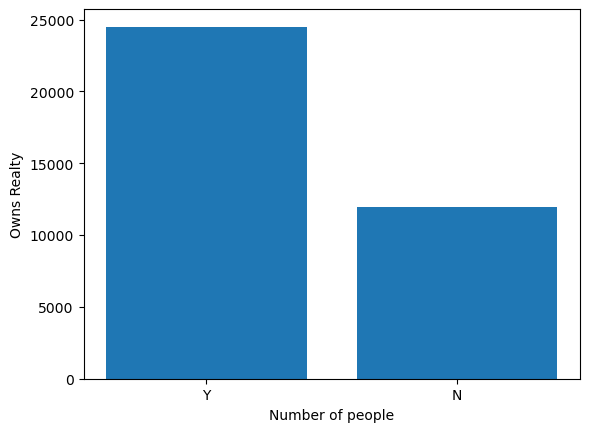

In [12]:
plt.bar(df_application['FLAG_OWN_REALTY'].value_counts().index, df_application['FLAG_OWN_REALTY'].value_counts().values)
plt.xlabel('Number of people')
plt.ylabel('Owns Realty')
plt.show()


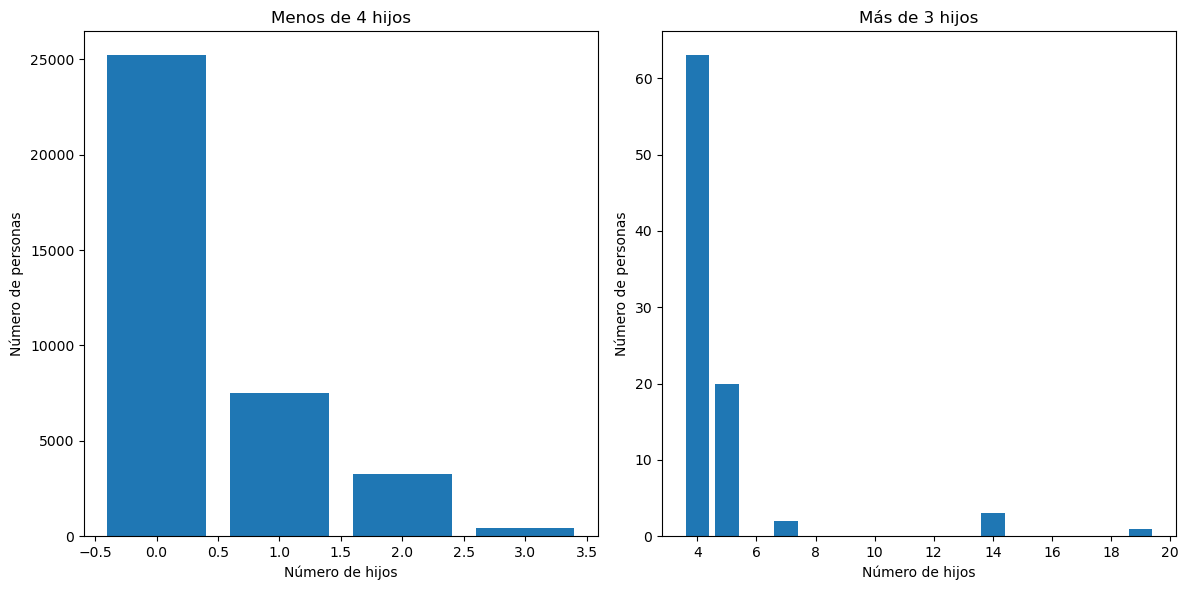

In [14]:
df_few_children = df_application[df_application['CNT_CHILDREN'] <= 3]
df_many_children = df_application[df_application['CNT_CHILDREN'] > 3]

# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el primer subplot: menos de 4 hijos
axs[0].bar(df_few_children['CNT_CHILDREN'].value_counts().index, df_few_children['CNT_CHILDREN'].value_counts().values)
axs[0].set_title('Menos de 4 hijos')
axs[0].set_xlabel('Número de hijos')
axs[0].set_ylabel('Número de personas')

# Graficar el segundo subplot: más de 3 hijos
axs[1].bar(df_many_children['CNT_CHILDREN'].value_counts().index, df_many_children['CNT_CHILDREN'].value_counts().values)
axs[1].set_title('Más de 3 hijos')
axs[1].set_xlabel('Número de hijos')
axs[1].set_ylabel('Número de personas')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

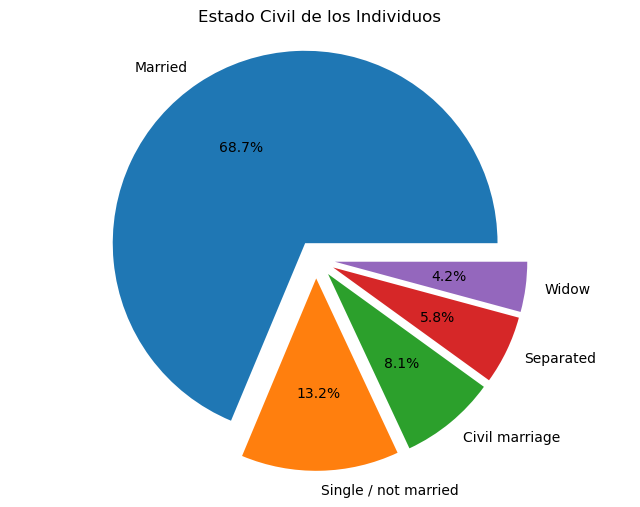

In [15]:
import matplotlib.pyplot as plt

# Obtener los recuentos de cada estado civil
family_status_counts = df_application['NAME_FAMILY_STATUS'].value_counts()

# Configurar el aspecto visual del gráfico
colors = plt.cm.tab10.colors  # Colores para cada porción del pastel
explode = [0.1] * len(family_status_counts)  # Destacar ligeramente cada porción

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(family_status_counts, labels=family_status_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Estado Civil de los Individuos')
plt.axis('equal')  # Hacer que el pastel sea circular
plt.show()


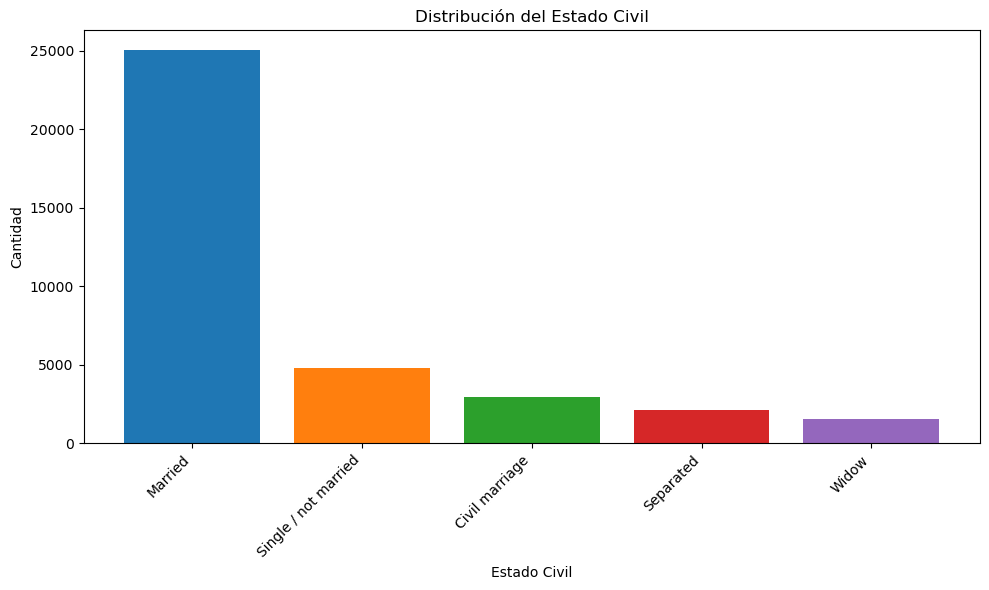

In [16]:

colors = plt.cm.tab10.colors[:len(family_status_counts)]

family_status_counts = df_application['NAME_FAMILY_STATUS'].value_counts()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.bar(family_status_counts.index, family_status_counts.values, color=colors)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.title('Distribución del Estado Civil')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


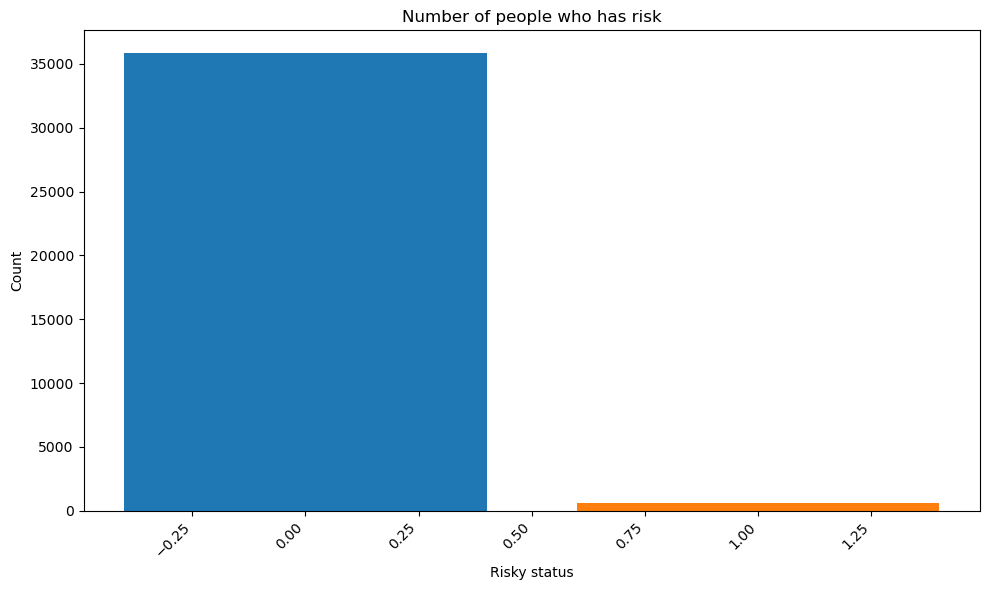

In [17]:
colors_risky= plt.cm.tab10.colors[:len(df_application['Risky'])]

risky_counts = df_application['Risky'].value_counts()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.bar(risky_counts.index, risky_counts.values, color=colors_risky)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Risky status')
plt.ylabel('Count')
plt.title('Number of people who has risk')

# Mostrar el gráfico
plt.tight_layout()
plt.show();

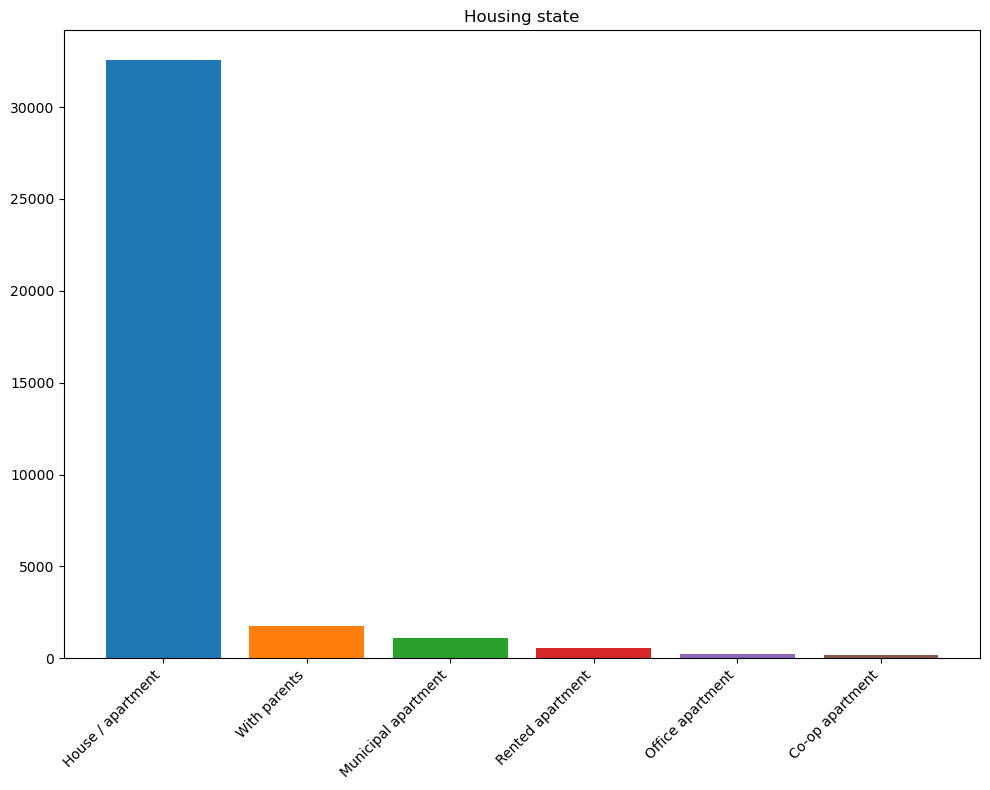

In [18]:
# Obtener los recuentos de cada vivienda
housing_counts = df_application['NAME_HOUSING_TYPE'].value_counts()

# Configurar el aspecto visual del gráfico
colors_housing = plt.cm.tab10.colors[:len(housing_counts)] # Colores para cada porción


# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
bars = plt.bar(housing_counts.index, housing_counts.values, color=colors_housing)
plt.xticks(rotation=45,ha='right')
plt.title('Housing state')
plt.tight_layout()
plt.show();

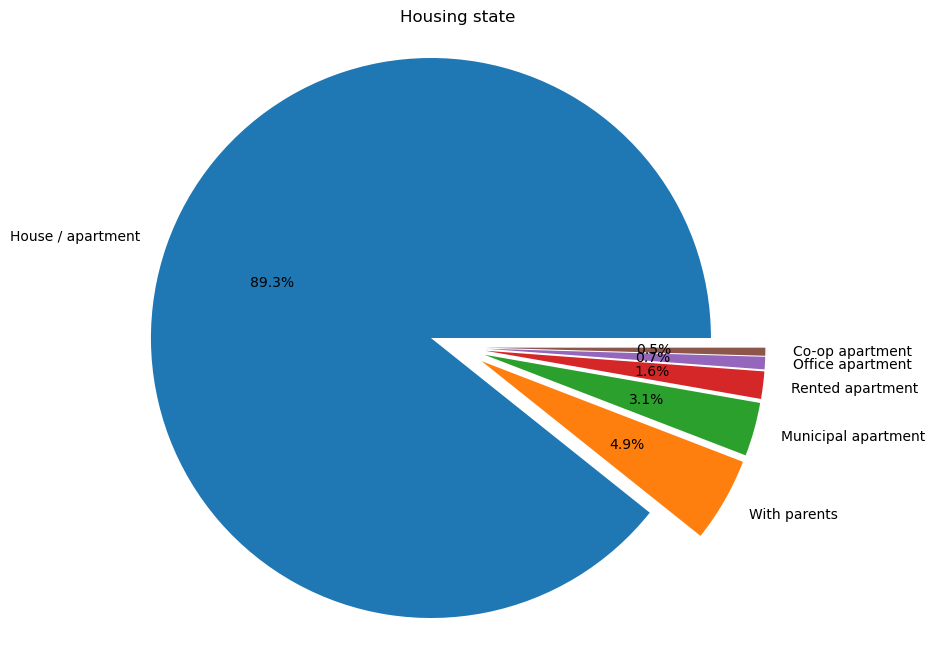

In [19]:
# Obtener los recuentos de cada vivienda
housing_counts = df_application['NAME_HOUSING_TYPE'].value_counts()

# Configurar el aspecto visual del gráfico
colors_housing = plt.cm.tab10.colors  # Colores para cada porción del pastel
explode = [0.1] * len(housing_counts)  # Destacar ligeramente cada porción

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', colors=colors_housing, explode=explode)
plt.title('Housing state')
plt.axis('equal')  # Hacer que el pastel sea circular
plt.show()

/home/jmarquez211/anaconda3/envs/data/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


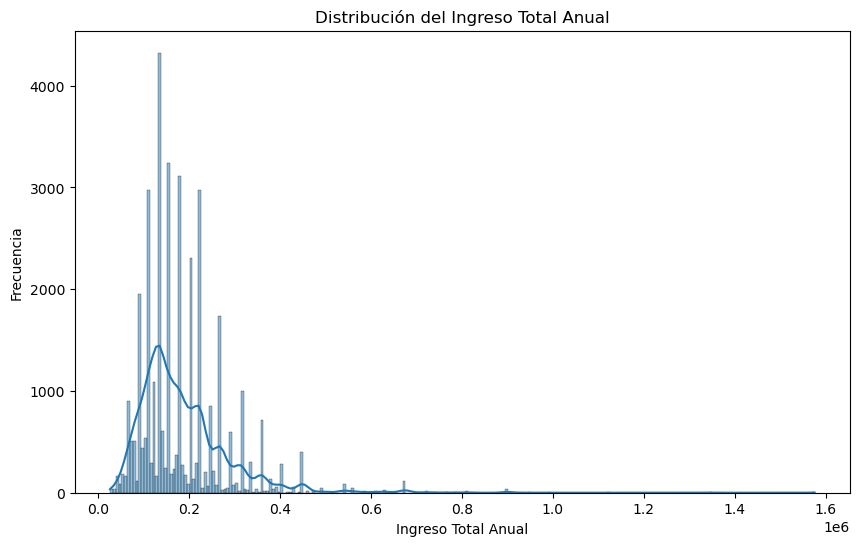

In [20]:
# Crear el gráfico de distribución con Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.histplot(df_application['AMT_INCOME_TOTAL'], kde=True)
plt.xlabel('Ingreso Total Anual')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ingreso Total Anual')
plt.show();

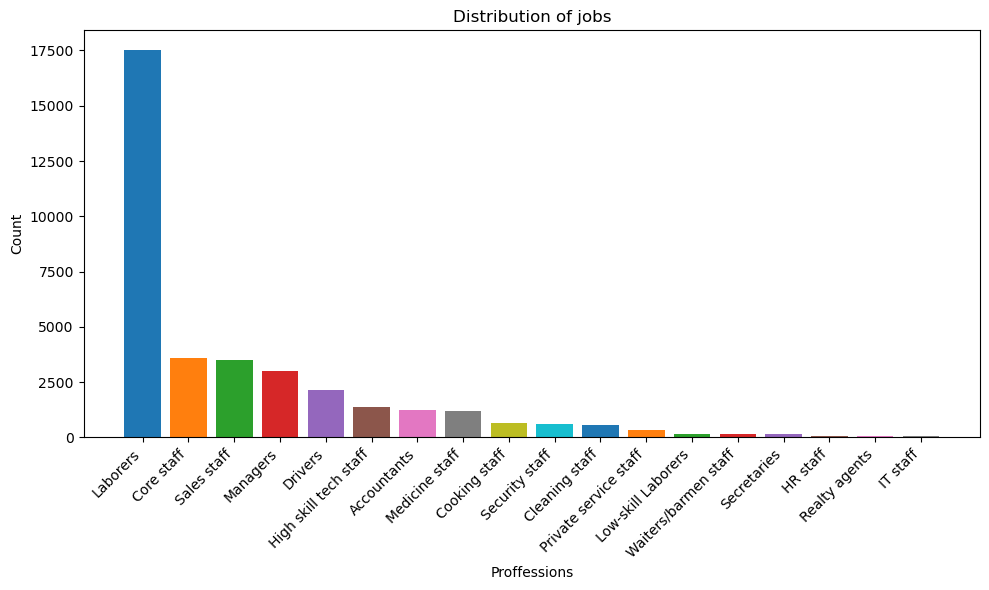

In [21]:



job_counts = df_application['OCCUPATION_TYPE'].value_counts()

colors_job = plt.cm.tab10.colors[:len(job_counts)]

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.bar(job_counts.index, job_counts.values, color=colors_job)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Proffessions')
plt.ylabel('Count')
plt.title('Distribution of jobs')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

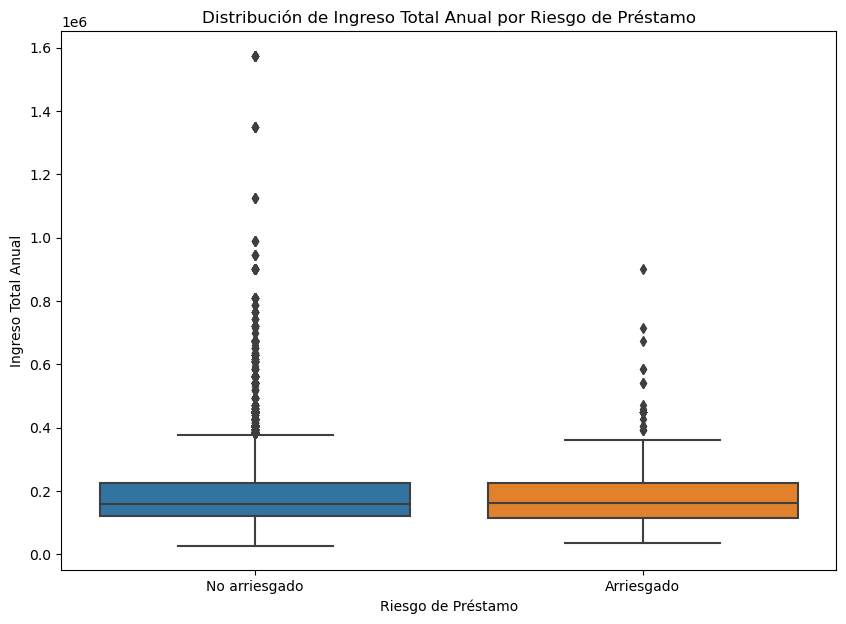

In [22]:

# Crear el gráfico de caja con Seaborn
plt.figure(figsize=(10, 7))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(x='Risky', y='AMT_INCOME_TOTAL', data=df_application)
plt.xlabel('Riesgo de Préstamo')
plt.ylabel('Ingreso Total Anual')
plt.title('Distribución de Ingreso Total Anual por Riesgo de Préstamo')
plt.xticks(ticks=[0, 1], labels=['No arriesgado', 'Arriesgado'])
plt.show()

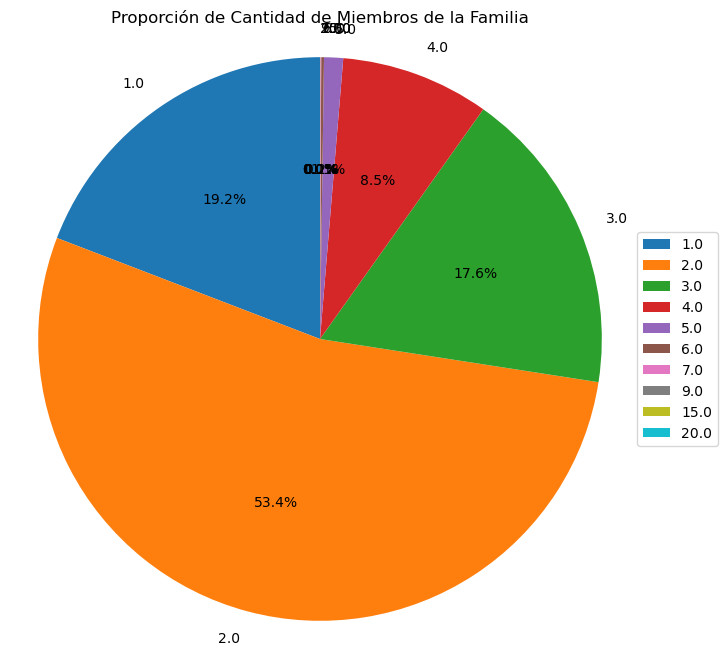

In [23]:
# Calcular el recuento de cada categoría
family_members_counts = df_application['CNT_FAM_MEMBERS'].value_counts()

# Obtener el porcentaje de cada categoría
percentages = (family_members_counts / family_members_counts.sum()) * 100

# Ordenar los porcentajes y los recuentos por la cantidad de miembros de la familia
percentages_sorted = percentages.sort_index()
family_members_counts_sorted = family_members_counts.sort_index()

# Configurar los colores
colors_family = plt.cm.tab10.colors

# Crear el gráfico de anillo
plt.figure(figsize=(8, 8))
plt.pie(family_members_counts_sorted, labels=family_members_counts_sorted.index, autopct='%1.1f%%', startangle=90, colors=colors_family)
plt.title('Proporción de Cantidad de Miembros de la Familia')

# Colocar la leyenda en el lado derecho
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()

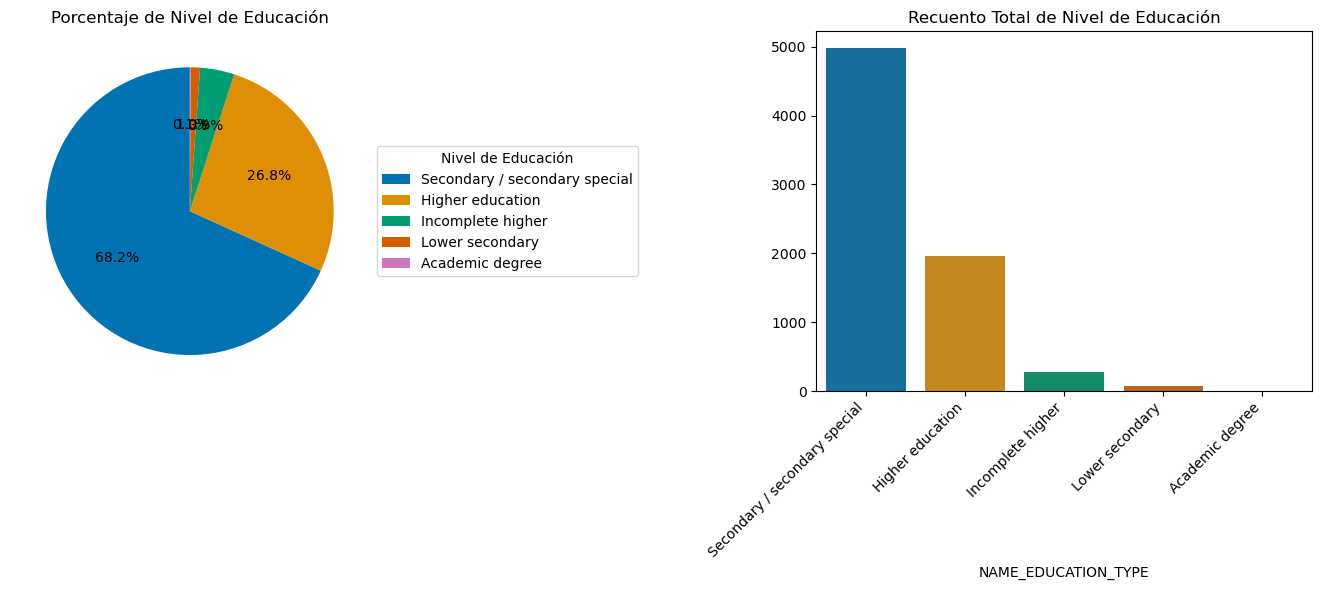

In [24]:
# Obtener el recuento de cada nivel de educación
education_counts = df_train_copy['NAME_EDUCATION_TYPE'].value_counts()

# Obtener los porcentajes de cada nivel de educación
education_percentages = (education_counts / education_counts.sum()) * 100

# Configurar los colores para el gráfico circular
colors_ed = sns.color_palette('colorblind')[0:len(education_counts)]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico circular (pie chart)
wedges, texts, autotexts = axes[0].pie(education_percentages, labels=None, autopct='%1.1f%%', colors=colors_ed, startangle=90)

# Ajustar las etiquetas
for autotext in autotexts:
    autotext.set_fontsize(10)

axes[0].set_title('Porcentaje de Nivel de Educación')

# Añadir leyenda
axes[0].legend(wedges, education_percentages.index, title='Nivel de Educación', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico de barras
barplot = sns.barplot(x=education_counts.index, y=education_counts.values, ax=axes[1], palette='colorblind')
axes[1].set_title('Recuento Total de Nivel de Educación')

# Inclinar las etiquetas del eje x
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

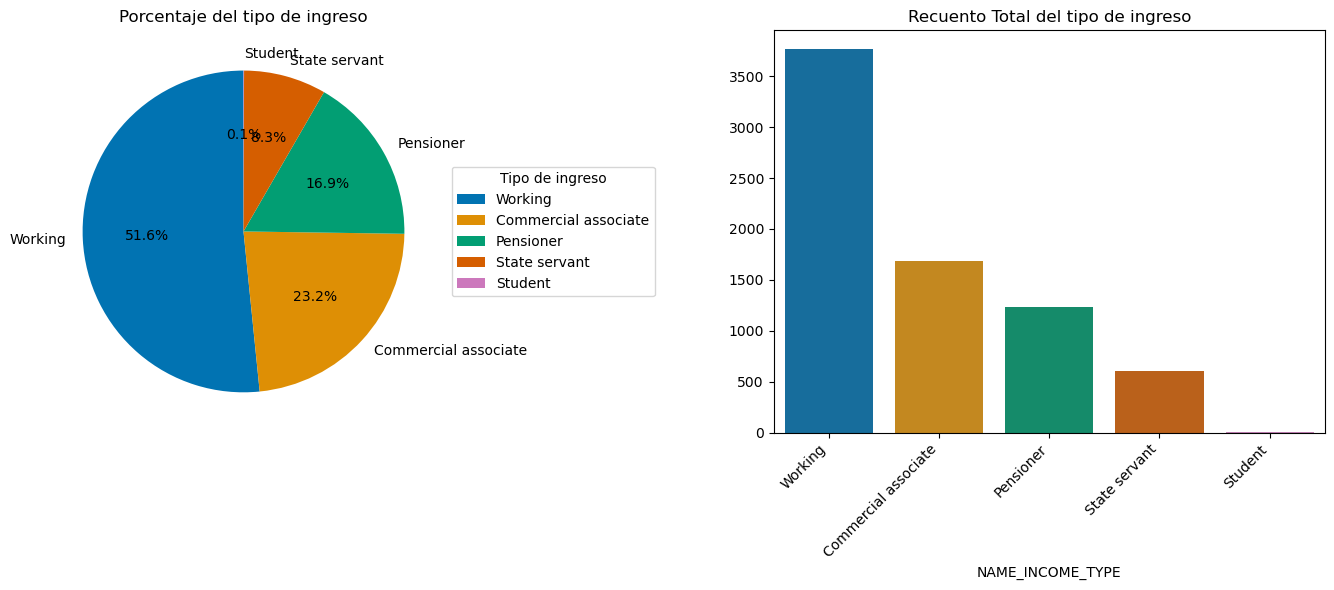

In [25]:
# Obtener el recuento de cada tipo de ingreso
intype_counts = df_train_copy['NAME_INCOME_TYPE'].value_counts()

# Obtener los porcentajes de cada tipo de ingreso
intype_percentages = (intype_counts / intype_counts.sum()) * 100

# Configurar los colores para el gráfico circular
colors_intype = sns.color_palette('colorblind')[0:len(intype_counts)]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico circular (pie chart)
wedges, texts, autotexts = axes[0].pie(intype_percentages, labels=intype_percentages.index, autopct='%1.1f%%', colors=colors_intype, startangle=90)

# Ajustar las etiquetas
for autotext in autotexts:
    autotext.set_fontsize(10)

axes[0].set_title('Porcentaje del tipo de ingreso')

# Añadir leyenda
axes[0].legend(wedges, intype_percentages.index, title='Tipo de ingreso', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico de barras
barplot = sns.barplot(x=intype_counts.index, y=intype_counts.values, ax=axes[1], palette='colorblind')
axes[1].set_title('Recuento Total del tipo de ingreso')

# Inclinar las etiquetas del eje x
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

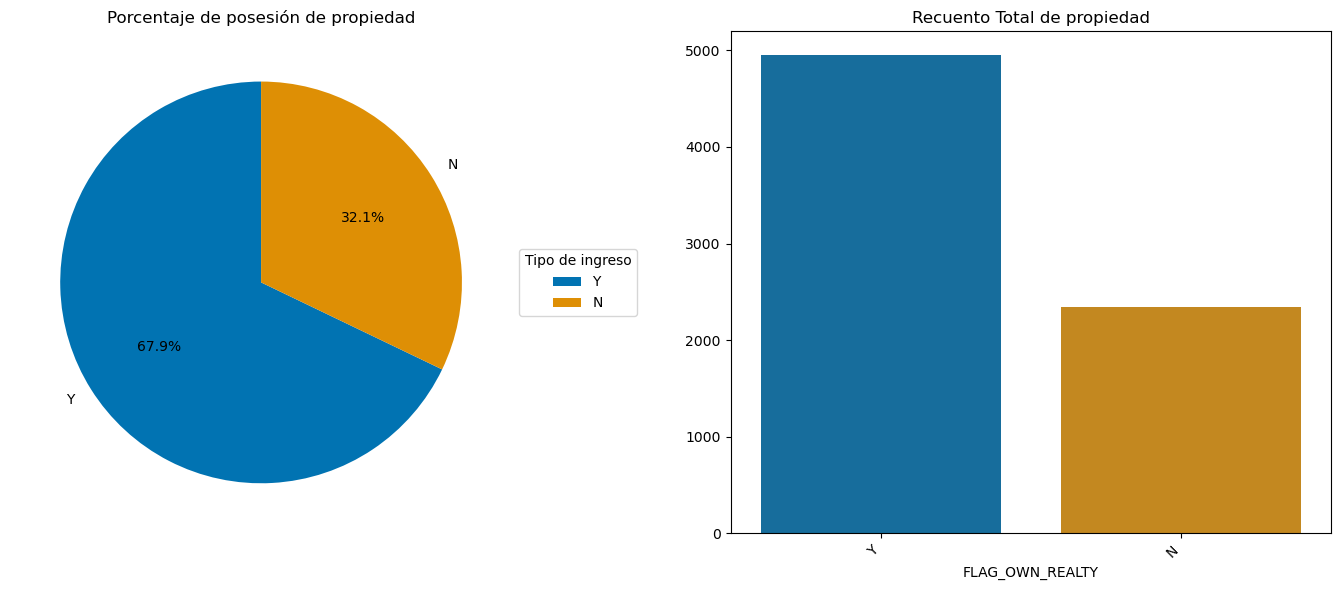

In [14]:
# Obtener el recuento de cada tipo de ingreso
property_counts = df_train_copy['FLAG_OWN_REALTY'].value_counts()

# Obtener los porcentajes de cada tipo de ingreso
property_percentages = (property_counts / property_counts.sum()) * 100

# Configurar los colores para el gráfico circular
colors_property = sns.color_palette('colorblind')[0:len(property_counts)]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico circular (pie chart)
wedges, texts, autotexts = axes[0].pie(property_percentages, labels=property_percentages.index, autopct='%1.1f%%', colors=colors_property, startangle=90)

# Ajustar las etiquetas
for autotext in autotexts:
    autotext.set_fontsize(10)

axes[0].set_title('Porcentaje de posesión de propiedad')

# Añadir leyenda
axes[0].legend(wedges, property_percentages.index, title='Tipo de ingreso', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico de barras
barplot = sns.barplot(x=property_counts.index, y=property_counts.values, ax=axes[1], palette='colorblind')
axes[1].set_title('Recuento Total de propiedad')

# Inclinar las etiquetas del eje x
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

/home/jmarquez211/anaconda3/envs/data/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


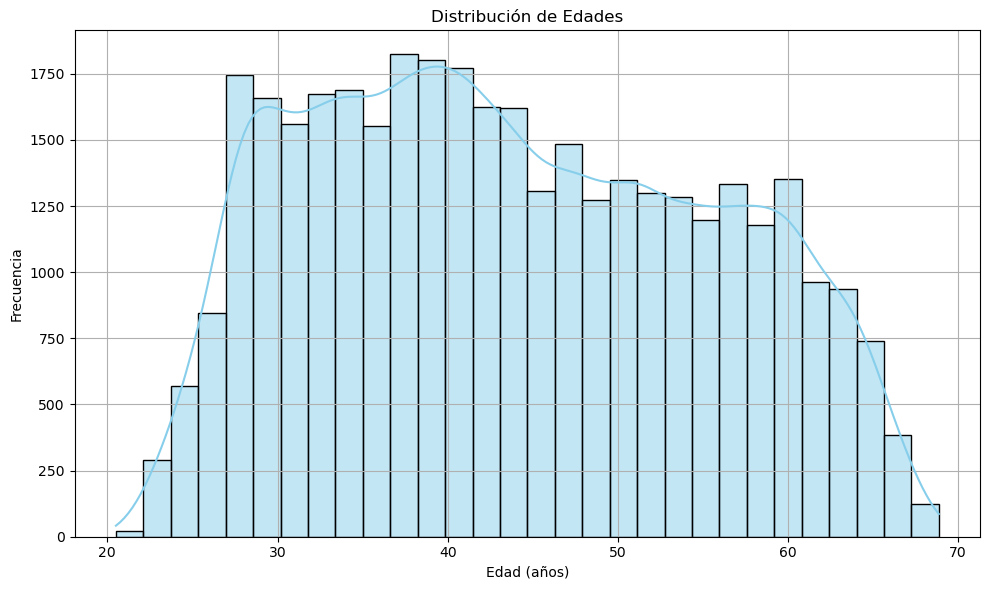

In [28]:
# Convertir días de nacimiento a años
import numpy as np
#df_train_copy['AGE'] = np.abs(df_train_copy['DAYS_BIRTH']) / 365

# Crear el histograma de distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(np.abs(df_application['DAYS_BIRTH'])/365.25, kde=True, color='skyblue',bins=30)
plt.title('Distribución de Edades')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(True)


plt.tight_layout()
plt.show()

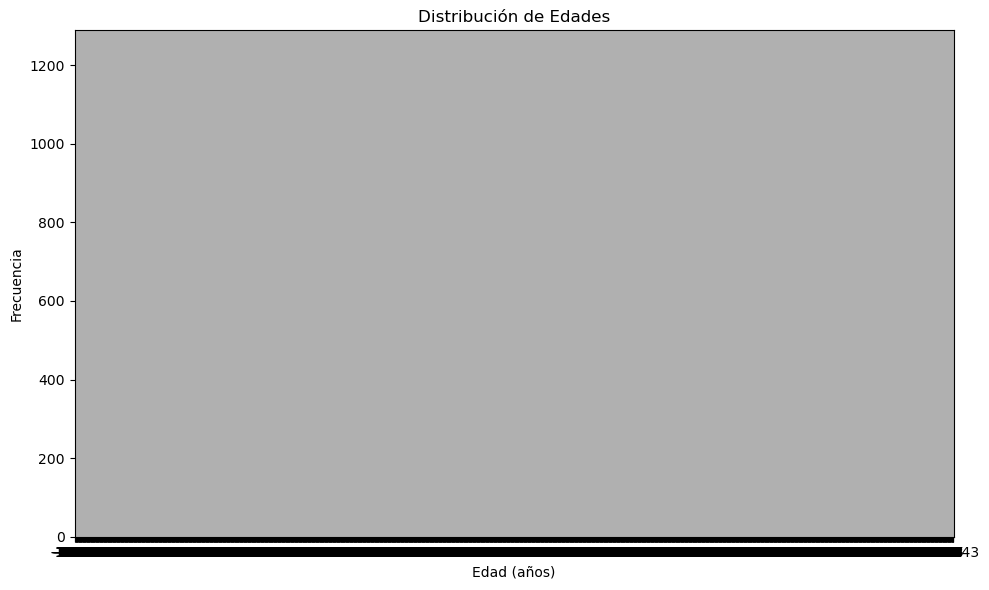

In [38]:
# Crear el histograma de distribución de edades

empl_counts = np.abs(df_train_copy['DAYS_EMPLOYED'].value_counts())

plt.figure(figsize=(10, 6))
sns.barplot(x=empl_counts.index, y=empl_counts.values, color='skyblue')
plt.title('Distribución de Edades')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(True)


plt.tight_layout()
plt.show()

In [22]:

''' 
faltaría por corregir un par de gráficas y añadir tres gráficas circulares en lo relativo a coches, móviles
'''


[-46.12054795 -49.66027397 -60.18356164 ... -35.37534247 -24.97260274
 -58.80547945]


In [43]:
df_train_copy

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account day,Risky,AGE
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,...,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0,0.126358
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,...,-948,1,0,1,0,Managers,2.0,-16.0,0,0.136056
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,...,-5215,1,0,0,1,Core staff,2.0,-52.0,0,0.164886
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,...,-456,1,0,0,0,Managers,2.0,-54.0,0,0.093654
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,...,-667,1,0,0,0,Laborers,2.0,-48.0,0,0.091237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1351,1,0,0,0,NaN,2.0,-22.0,0,0.163062
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,...,-3550,1,0,0,1,Drivers,2.0,-42.0,0,0.112411
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,...,-5030,1,1,1,0,NaN,1.0,-25.0,0,0.153740
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-6678,1,1,0,0,Laborers,2.0,-49.0,0,0.142098


In [8]:
# Reemplazar los valores en la columna CODE_GENDER
df_train_copy['CODE_GENDER'] = df_train_copy['CODE_GENDER'].replace({'M': 1, 'F': 0})

# Reemplazar los valores en la columna FLAG_OWN_CAR
df_train_copy['FLAG_OWN_CAR'] = df_train_copy['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})




In [42]:
df_train_copy.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
Account day            float64
Risky                   object
AGE                    float64
dtype: object

In [10]:
df_train_copy2 = df_train_copy.copy()

      

In [11]:
# Reemplazar los valores en la columna CODE_GENDER
df_train_copy2['CODE_GENDER'] = df_train_copy2['CODE_GENDER'].replace({'M': 1, 'F': 0})

# Reemplazar los valores en la columna FLAG_OWN_CAR
df_train_copy2['FLAG_OWN_CAR'] = df_train_copy2['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})

In [12]:
df_train_copy2['NAME_EDUCATION_TYPE'] = df_train_copy2['NAME_EDUCATION_TYPE'].replace({
    'Secondary / secondary special': 0,
    'Higher education': 1,
    'Incomplete higher': 2,
    'Lower secondary': 3,
    'Academic degree': 4
})

# Reemplazar valores en las columnas NAME_FAMILY_STATUS
df_train_copy2['NAME_FAMILY_STATUS'] = df_train_copy2['NAME_FAMILY_STATUS'].replace({
    'Separated': 0,
    'Married': 1,
    'Civil marriage': 2,
    'Single / not married': 3,
    'Widow': 4
})

# Reemplazar valores en las columnas NAME_HOUSING_TYPE
df_train_copy2['NAME_HOUSING_TYPE'] = df_train_copy2['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 0,
    'Municipal apartment': 1,
    'With parents': 2,
    'Co-op apartment': 3,
    'Rented apartment': 4,
    'Office apartment': 5
})

# Reemplazar valores en las columnas NAME_INCOME_TYPE
df_train_copy2['NAME_INCOME_TYPE'] = df_train_copy2['NAME_INCOME_TYPE'].replace({
    'State servant': 0,
    'Commercial associate': 1,
    'Working': 2,
    'Pensioner': 3,
    'Student': 4
})

# Reemplazar valores en la columna OCCUPATION_TYPE
df_train_copy2['OCCUPATION_TYPE'] = df_train_copy2['OCCUPATION_TYPE'].replace({
    'Medicine staff': 0,
    'Managers': 1,
    'Core staff': 2,
    'Laborers': 3,
    'Sales staff': 4,
    'Waiters/barmen staff': 5,
    'High skill tech staff': 6,
    'Drivers': 7,
    'HR staff': 8,
    'Cleaning staff': 9,
    'Accountants': 10,
    'Realty agents': 11,
    'Security staff': 12,
    'Secretaries': 13,
    'Cooking staff': 14,
    'Private service staff': 15,
    'IT staff': 16,
    'Low-skill Laborers': 17
})

# Reemplazar valores en la columna Risky
df_train_copy2['Risky'] = df_train_copy2['Risky'].replace({'1': 1, '0': 0})

In [13]:
df_train_copy2['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df_train_copy2['FLAG_OWN_REALTY'] = df_train_copy2['FLAG_OWN_REALTY'].replace({'Y':1,'N':0})

In [63]:
#corr_matrix = df_train_copy2.corr()
df_train_copy2.dtypes


ID                       int64
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
DAYS_BIRTH             float64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE        float64
CNT_FAM_MEMBERS        float64
Account day            float64
Risky                    int64
AGE                    float64
dtype: object

/home/jmarquez211/anaconda3/envs/data/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


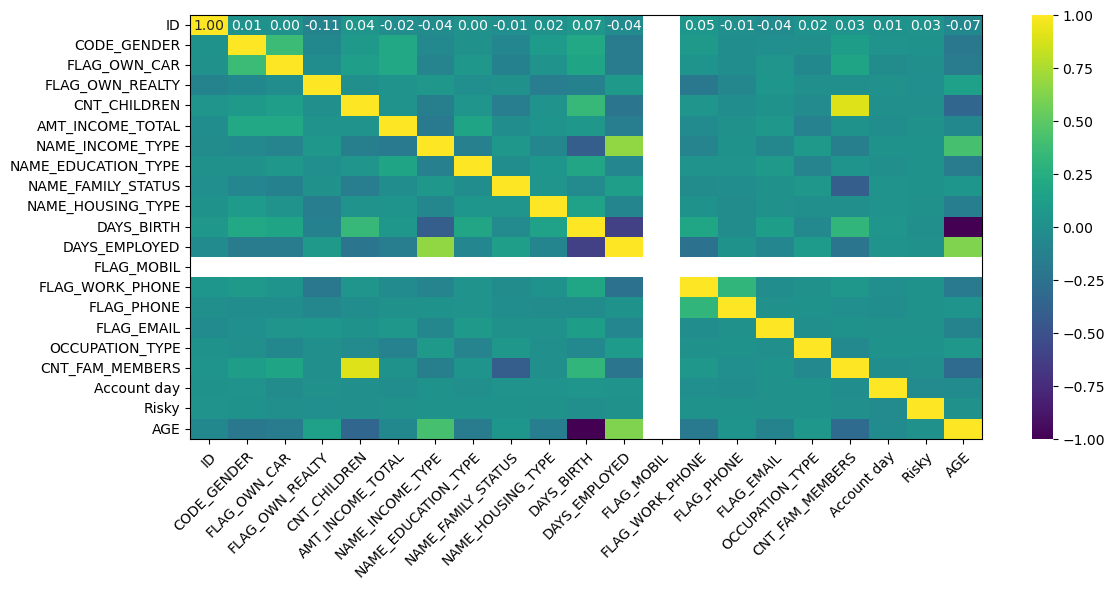

In [69]:
corr_matrix = df_train_copy2.corr()

# Crear el mapa de calor
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", ax=ax)

# Ajustar la posición y el tamaño de las anotaciones
for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
df_test_copy2 = df_test_copy.copy()

In [16]:
# Reemplazar los valores en la columna CODE_GENDER
df_test_copy2['CODE_GENDER'] = df_test_copy2['CODE_GENDER'].replace({'M': 1, 'F': 0})

# Reemplazar los valores en la columna FLAG_OWN_CAR
df_test_copy2['FLAG_OWN_CAR'] = df_test_copy2['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})

In [17]:
df_test_copy2['NAME_EDUCATION_TYPE'] = df_test_copy2['NAME_EDUCATION_TYPE'].replace({
    'Secondary / secondary special': 0,
    'Higher education': 1,
    'Incomplete higher': 2,
    'Lower secondary': 3,
    'Academic degree': 4
})

# Reemplazar valores en las columnas NAME_FAMILY_STATUS
df_test_copy2['NAME_FAMILY_STATUS'] = df_test_copy2['NAME_FAMILY_STATUS'].replace({
    'Separated': 0,
    'Married': 1,
    'Civil marriage': 2,
    'Single / not married': 3,
    'Widow': 4
})

# Reemplazar valores en las columnas NAME_HOUSING_TYPE
df_test_copy2['NAME_HOUSING_TYPE'] = df_test_copy2['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 0,
    'Municipal apartment': 1,
    'With parents': 2,
    'Co-op apartment': 3,
    'Rented apartment': 4,
    'Office apartment': 5
})

# Reemplazar valores en las columnas NAME_INCOME_TYPE
df_test_copy2['NAME_INCOME_TYPE'] = df_test_copy2['NAME_INCOME_TYPE'].replace({
    'State servant': 0,
    'Commercial associate': 1,
    'Working': 2,
    'Pensioner': 3,
    'Student': 4
})

# Reemplazar valores en la columna OCCUPATION_TYPE
df_test_copy2['OCCUPATION_TYPE'] = df_test_copy2['OCCUPATION_TYPE'].replace({
    'Medicine staff': 0,
    'Managers': 1,
    'Core staff': 2,
    'Laborers': 3,
    'Sales staff': 4,
    'Waiters/barmen staff': 5,
    'High skill tech staff': 6,
    'Drivers': 7,
    'HR staff': 8,
    'Cleaning staff': 9,
    'Accountants': 10,
    'Realty agents': 11,
    'Security staff': 12,
    'Secretaries': 13,
    'Cooking staff': 14,
    'Private service staff': 15,
    'IT staff': 16,
    'Low-skill Laborers': 17
})

# Reemplazar valores en la columna Risky
df_test_copy2['Risky'] = df_test_copy2['Risky'].replace({'1': 1, '0': 0})

df_test_copy2['FLAG_OWN_REALTY'] = df_test_copy2['FLAG_OWN_REALTY'].replace({'Y':1,'N':0})

In [125]:
df_test_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   CODE_GENDER          7292 non-null   int64  
 2   FLAG_OWN_CAR         7292 non-null   int64  
 3   FLAG_OWN_REALTY      7292 non-null   int64  
 4   CNT_CHILDREN         7292 non-null   int64  
 5   AMT_INCOME_TOTAL     7292 non-null   float64
 6   NAME_INCOME_TYPE     7292 non-null   int64  
 7   NAME_EDUCATION_TYPE  7292 non-null   int64  
 8   NAME_FAMILY_STATUS   7292 non-null   int64  
 9   NAME_HOUSING_TYPE    7292 non-null   int64  
 10  DAYS_BIRTH           7292 non-null   int64  
 11  DAYS_EMPLOYED        7292 non-null   int64  
 12  FLAG_MOBIL           7292 non-null   int64  
 13  FLAG_WORK_PHONE      7292 non-null   int64  
 14  FLAG_PHONE           7292 non-null   int64  
 15  FLAG_EMAIL           7292 non-null   i

In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
!pip3 install shap
import shap
#from sklearn.ensemble import RandomForestClassifier

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [25]:
from sklearn.preprocessing import StandardScaler

#numerical_features = hp.select_dtypes(include=[np.number]).columns
numerical_data = df_application._get_numeric_data()
num_cols = numerical_data.columns

scaler = StandardScaler()
numercial_df = pd.DataFrame(scaler.fit_transform(numerical_data), columns= num_cols, index=df_application.index)

In [29]:
import numpy as np

df_dummies = pd.get_dummies(data = df_application[["FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
                                                   "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE",
                                                   "Risky"]], drop_first = True)

df_num_features=df_application.select_dtypes(include=np.number)

df = pd.concat([df_num_features, df_dummies], axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  int64  
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   DAYS_BIRTH                                         36457 non-null  float64
 3   DAYS_EMPLOYED                                      36457 non-null  int64  
 4   FLAG_MOBIL                                         36457 non-null  int64  
 5   FLAG_WORK_PHONE                                    36457 non-null  int64  
 6   FLAG_PHONE                                         36457 non-null  int64  
 7   FLAG_EMAIL                                         36457 non-null  int64  
 8   CNT_FAM_MEMBERS                                    36457 non-null  float64
 9   Accoun

In [28]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Account day_x,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,Risky_1
0,0,427500.0,-32.890411,-4542,1,1,0,0,2.0,-15.0,...,False,False,False,False,False,False,False,False,False,False
1,0,427500.0,-32.890411,-4542,1,1,0,0,2.0,-14.0,...,False,False,False,False,False,False,False,False,False,False
2,0,112500.0,-58.832877,-1134,1,0,0,0,2.0,-29.0,...,False,False,False,False,False,False,False,True,False,False
3,0,270000.0,-52.356164,-3051,1,0,1,1,1.0,-4.0,...,False,False,False,False,False,True,False,False,False,False
4,0,270000.0,-52.356164,-3051,1,0,1,1,1.0,-26.0,...,False,False,False,False,False,True,False,False,False,False


In [33]:
target = df['Risky_1']
feats = df.drop('Risky_1', axis=1)

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2)

In [34]:
import xgboost as xgb

params = {'objective': 'binary:logistic', 'max_depth':6, 'eval_metric':'logloss'}

dtrain = xgb.DMatrix(X_train,label=y_train)

dtest = xgb.DMatrix(data=X_test,label=y_test)


bst = xgb.train(params,dtrain,1000)

In [35]:
explainer = shap.TreeExplainer(bst,
                               data = X_train,
                               model_output="probability")

shap_values = explainer.shap_values(X_test)

print('Expected value: ', explainer.expected_value)

pd.DataFrame(shap_values).head()

Found a NULL input array in _cext_dense_tree_update_weights!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'